In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-26 02:36:40.398786: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 02:36:40.650241: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 02:36:40.650523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 02:36:40.699348: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-26 02:36:40.817545: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 02:36:40.819259: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
import custom_module as cc #My custom module

## Loading my Data/Ensuring Module Works

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255) #Applying normalization, here.
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Directories:
# 'archive (13)/Data/train/'
# 'archive (13)/Data/valid/'
# 'archive (13)/Data/test/'

In [4]:
train_dataset = cc.data_loader(train_datagen,'archive (13)/Data/train/')
valid_dataset = cc.data_loader(valid_datagen,'archive (13)/Data/valid/')
test_dataset = cc.data_loader(test_datagen,'archive (13)/Data/test/')

Found 404 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 296 images belonging to 4 classes.


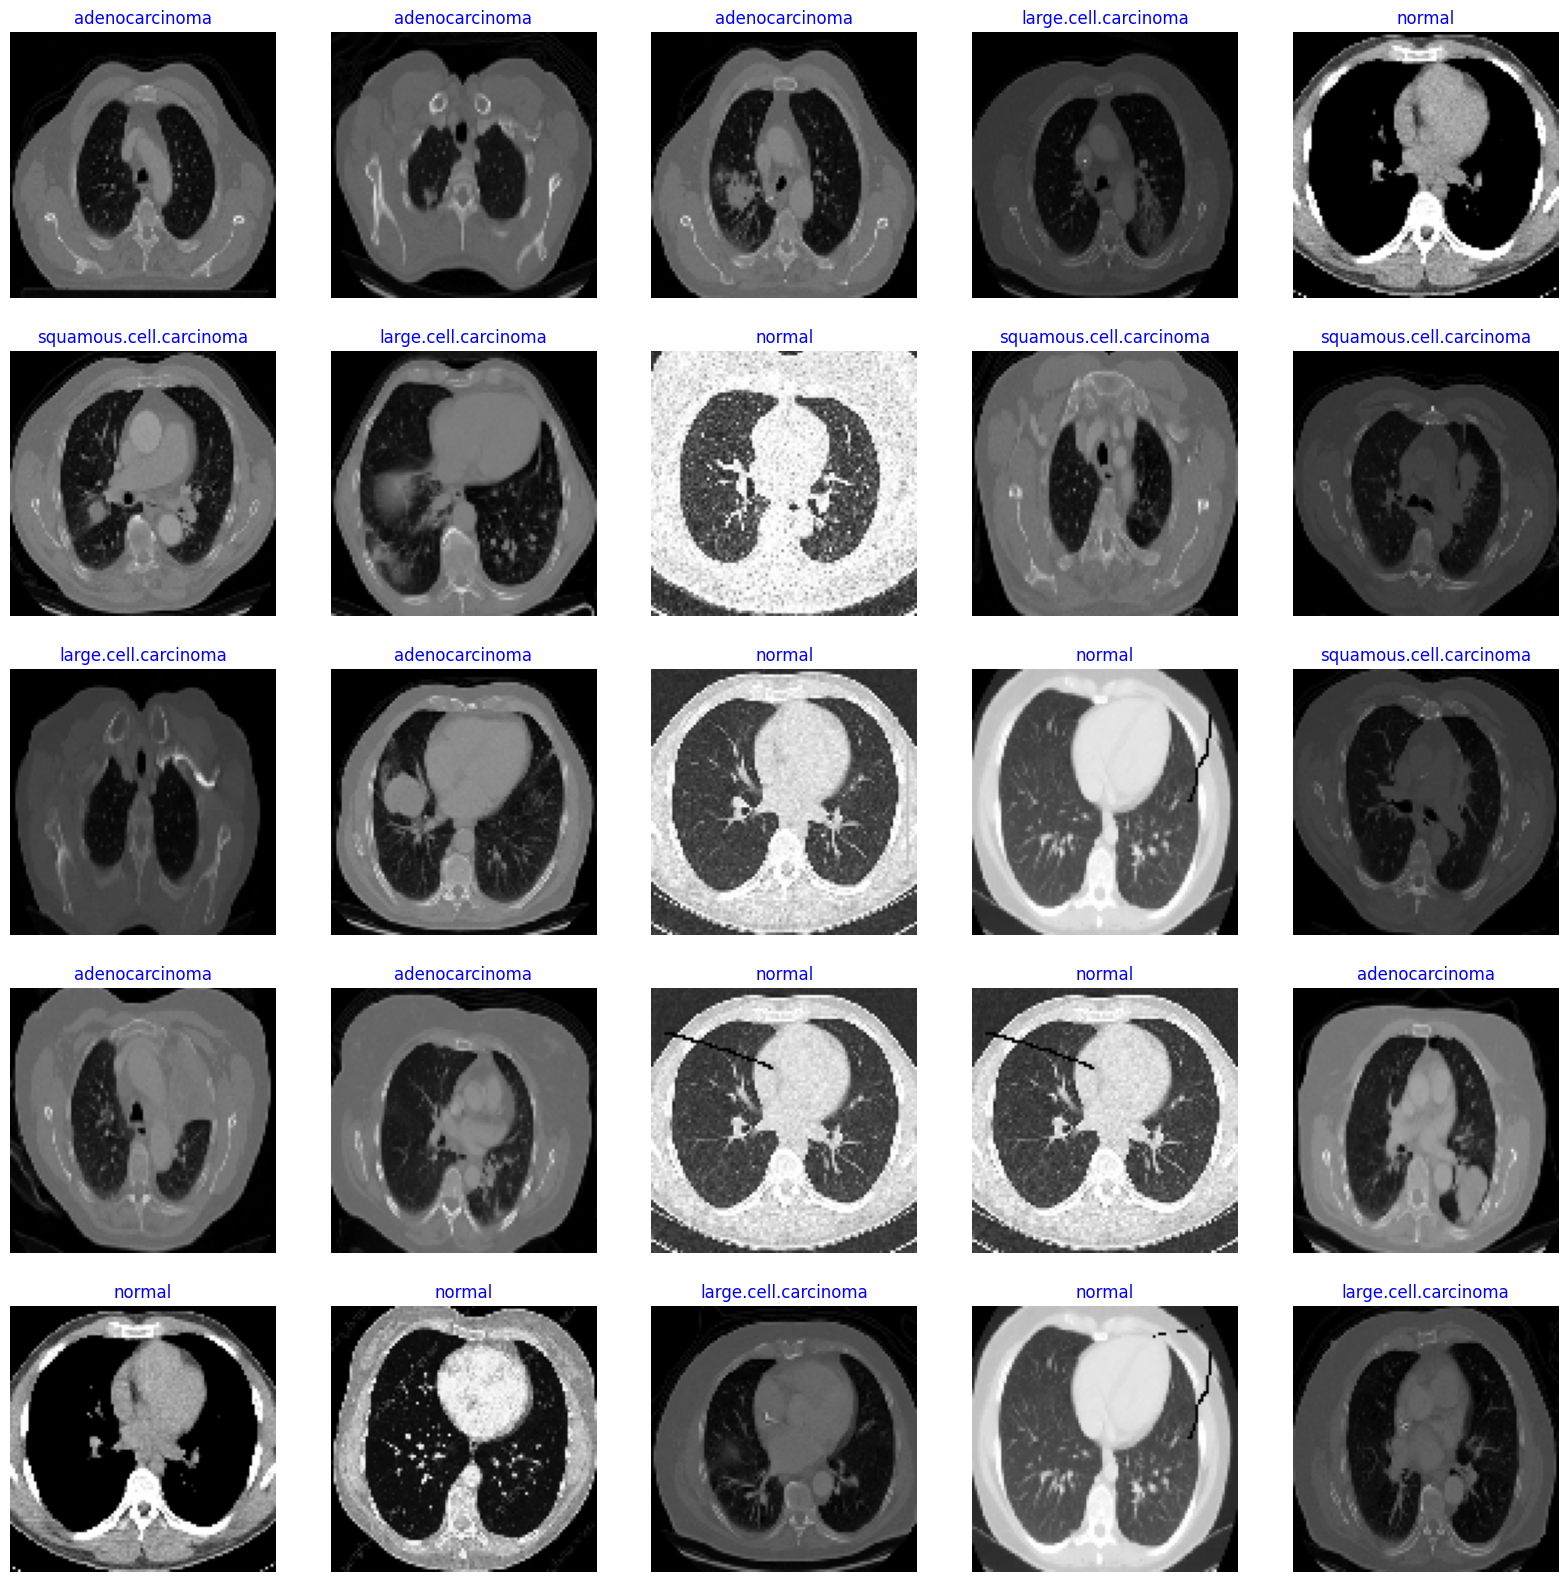

In [5]:
cc.show_images(train_dataset) #ensuring module works

In [6]:
#cc.show_images(valid_dataset)

## Training a Base Model WITHOUT Any Augmentation

In [9]:
#cc.get_ds_size('archive (13)/Data/train/')

In [10]:
#cc.get_ds_size('archive (13)/Data/valid/')

In [11]:
##Using Transfer Learning
import keras

base_model = keras.applications.EfficientNetV2B0(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [12]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

output = Dense(4, activation='softmax')(base_model.output)

model = Model(inputs=base_model.input, outputs=output)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_dataset,
                    epochs=5,      #My laptop is struggling to train. Going to lower epochs from 10 to 5.
                    batch_size=32, #Wont be a good analysis but I can't get anything done otherwise.
                    validation_data=valid_dataset)

Epoch 1/5
4/4 [==============================] - 38s 7s/step - loss: 1.3839 - accuracy: 0.4109 - val_loss: 1.3862 - val_accuracy: 0.1806
Epoch 2/5
4/4 [==============================] - 14s 5s/step - loss: 1.3689 - accuracy: 0.6460 - val_loss: 1.3861 - val_accuracy: 0.1806
Epoch 3/5
4/4 [==============================] - 15s 3s/step - loss: 1.3554 - accuracy: 0.6931 - val_loss: 1.3857 - val_accuracy: 0.2917
Epoch 4/5
4/4 [==============================] - 13s 3s/step - loss: 1.3383 - accuracy: 0.7797 - val_loss: 1.3854 - val_accuracy: 0.2917
Epoch 5/5
4/4 [==============================] - 15s 5s/step - loss: 1.3299 - accuracy: 0.7673 - val_loss: 1.3853 - val_accuracy: 0.2917


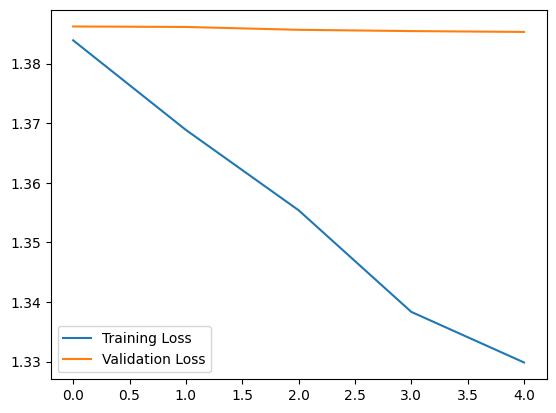

In [14]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend() #Not performing well. Training loss looks alright, decreasing but still too high. Validation loss is definitely a problem.
#Probably due to both the size and the nature of my dataset.
#trained on ImageNet, which may not transfer well to my medical images.

#Also this took forever to train and my laptop sounds like a jet engine.
#Time to download more RAM and also a GPU.......

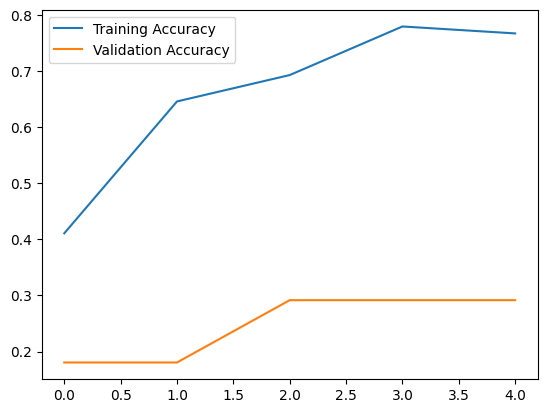

In [15]:
plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training Accuracy")
plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation Accuracy")
plt.legend()

In [16]:
#Yikes.

In [17]:
model.save('Models/BaseModel_1.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tensorflow.python.ops.init_ops_v2.Constant'>, which may lead to improper serialization.
  warnings.warn(
